## UDACITY PROJECT 4 : WRANGLE AND ANALYZE DATA

In [1]:
# Import statements
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import requests
import seaborn as sns
import tweepy

from datetime import datetime
from functools import reduce



### Data Gathering

In [2]:
# Load the enhanced twitter archive file we were given
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')
twitter1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Web Scraping the image predictions file and saving it as tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load the image predictions file spearated by space
images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Setting up the Twitter API with credentials
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
tweet_ids = list(twitter1['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 33


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 66


In [7]:
# to see how actually the tweet data is
print(tweet_data[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [8]:
# dumping tweet data from twitter to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [9]:
# Load the Twitter API data from json file
twitter2 = pd.read_json('tweet_json.txt')
twitter2['tweet_id'] = tweet_id_success
#fetching only the tweet_id , favourite_count and retweet_count
twitter2=twitter2[['tweet_id', 'favorite_count', 'retweet_count']]
twitter2.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35962,7651
1,892177421306343426,31034,5650


### Assess

In [10]:
#anaylsing the shapes of datasets
print("Shape of twitter1 dataset  ", twitter1.shape)
print("Shape of images dataset  ", images.shape)
print("Shape of twitter2 dataset  ", twitter2.shape)


Shape of twitter1 dataset   (2356, 17)
Shape of images dataset   (2075, 12)
Shape of twitter2 dataset   (2331, 3)


### Analysis of twitter 1 dataset

In [11]:
twitter1.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter1.info() #finding info about missing data in twitter1 dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter1.duplicated().sum() #no duplicate rows for twitter1

0

In [14]:
twitter1.isnull().sum()  # finding out null values for each column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter1.nunique() #finding out the unique values for each columns

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
twitter1['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Lola             10
Penny            10
Tucker           10
Winston           9
Bo                9
Sadie             8
the               8
Buddy             7
Daisy             7
Bailey            7
an                7
Toby              7
Oscar             6
Jack              6
Milo              6
Leo               6
Rusty             6
Jax               6
Koda              6
Scout             6
Dave              6
Stanley           6
Bella             6
Larry             5
               ... 
Koko              1
Maks              1
Chesney           1
Sojourner         1
unacceptable      1
Pumpkin           1
Jarod             1
Snickers          1
Callie            1
Lupe              1
Harrison          1
Fabio             1
Lilli             1
Rontu             1
Banditt           1
Meatball          1
Tedrick           1
Biden             1
Monty             1


In [17]:
np.sort(twitter1['name'].unique()) # sort the values of name column in the dataset

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

In [18]:
# the lowercase names in the 'name' column seem to be wrong, let's look at them
twitter1.loc[(twitter1['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [19]:
# checking the unique values of doggo, floofer, pupper and puppo column
print(twitter1['doggo'].unique(), twitter1['floofer'].unique(), twitter1['pupper'].unique(), twitter1['puppo'].unique())

['None' 'doggo'] ['None' 'floofer'] ['None' 'pupper'] ['None' 'puppo']


In [20]:
#finding columns where dog type is none
twitter1.loc[(twitter1['doggo']== 'None') & (twitter1['floofer']== 'None') & (twitter1['pupper']== 'None') & (twitter1['puppo']== 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None


In [21]:
# Are there any ratings using decimal numbers?
# For some tweet id ratings were caculated as in mentioned in the text columns and only the decimal part was used for 
#calculating the rating
twitter1[twitter1['text'].str.contains(r'(\d+\.\d+\/\d+)')]

C:\Users\LAPTOP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [22]:
twitter1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


###  Analysis of images dataset

In [23]:
images.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
images.info() #analysing the images dataset for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
images.duplicated().sum() # no duplicated rows in this dataset

0

In [26]:
images.isnull().sum() #finding out how many null values are there for each column

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
images['tweet_id'].duplicated().any() # no duplicate tweet id in this dataset

False

In [28]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [29]:
images['p1_dog'].value_counts() 

True     1532
False     543
Name: p1_dog, dtype: int64

In [30]:
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Analysis of Twitter2 Dataset

In [32]:
twitter2.head(5)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35962,7651
1,892177421306343426,31034,5650
2,891815181378084864,23355,3748
3,891689557279858688,39247,7807
4,891327558926688256,37485,8411


In [33]:
twitter2.info() #analysing the mssing values for twitter2 dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [34]:
twitter2.duplicated().sum() #finding duplicate rows in this dataset

0

In [35]:
twitter2.isnull().sum() #finding the number of null values for each column

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [36]:
twitter2['tweet_id'].duplicated().any()

False

## Quality Issues

#### Twitter1 Dataset

1. Tweet_id should be of object type but instead is integer type.
2. timestamp and retweeted_status_timestamp are currently of type 'object' but instead should be timestamp
3. name has values that are the string "None" instead of NaN and some also have weird names such as "the" , "an" etc.
4. doggo, floofer, pupper, and puppo have values that are the string "None" instead of NaN
5. Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN)
6. Also, there are ratings with decimals such as 13.5/10, 9.5/10 have been incorrectly extracted as 5/10 and put in          numerator and denominator.
7. There are many columns in this dataframe making it hard to read, and some will not be needed for analysis.


#### Twitter2 Dataset

1. There are missing tweets compared to the twitter1 datagrame (I am assuming they have been deleted)

#### Images Dataset

1. There are 2356 tweets in the twitter1 dataframe and 2075 rows in the images dataframe. This could mean that there is      missing data, or that not all 2356 of the tweets had pictures.
2. tweet_id is an integer but should be object type.


## Tidiness Issues

#### Twitter1 dataset

1.  variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

#### Twitter2 dataset

1. twitter2 data should be combined with the twitter1 data since they are information about the same tweet 

#### Images Dataset

1. images data could be combined with the twitter1 data as well since it is all information about 1 tweet
2. the dog breed prediction and prediction confidence could be each packed into one column


### Cleaning Phase

In [37]:
#Make copies so that original data remains same
twitter1_copy=twitter1.copy()
twitter2_copy=twitter2.copy()
images_copy=images.copy()

### Tidiness issue 1 - Merge all dataframes

In [38]:
# merging the three datasets on common column which is 'tweet_id'
datasets = [twitter1_copy, twitter2_copy, images_copy]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), datasets)
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [39]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
doggo                         2059 non-null object
floofer                       2059 non-null object
pupper                        2059 non-null object
puppo                         2059 non-null object
favorite_count                2059 

### Tidiness issue 2 - One column for dog stages

In [40]:
twitter['dog_stage'] = twitter['text'].str.lower().map(lambda x: np.NaN if "both" in x 
                                                                        else "puppo" if "puppo" in x 
                                                                        else "doggo" if "doggo" in x 
                                                                        else "pupper" if "pupper" in x 
                                                                        else "floofer" if "floofer" in x 
                                                                        else np.NaN)
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [41]:
twitter.info() # checking if dog stage is created and rest all are deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 27 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
favorite_count                2059 non-null int64
retweet_count                 2059 non-null int64
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non

### Tidiness Issue 3 - the dog breed prediction and prediction confidence could be each packed into one column

In [42]:
# write a function that extracts the first dog breed prediction from the predictions DataFrame
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)

In [43]:
# apply the breed function to the clean DataFrame to create a new column 'breed'
twitter['breed'] = twitter.apply (lambda row: breed (row),axis=1)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
favorite_count                2059 non-null int64
retweet_count                 2059 non-null int64
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non

In [44]:
# write a function that extracts the confidence for the first dog breed prediction from the predictions DataFrame
def confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)

In [45]:
# apply the confidence function to the clean DataFrame to create a new column 'breed_confidence'
twitter['breed_confidence'] = twitter.apply (lambda row: confidence(row),axis=1)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 29 columns):
tweet_id                      2059 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2059 non-null object
source                        2059 non-null object
text                          2059 non-null object
retweeted_status_id           72 non-null float64
retweeted_status_user_id      72 non-null float64
retweeted_status_timestamp    72 non-null object
expanded_urls                 2059 non-null object
rating_numerator              2059 non-null int64
rating_denominator            2059 non-null int64
name                          2059 non-null object
favorite_count                2059 non-null int64
retweet_count                 2059 non-null int64
jpg_url                       2059 non-null object
img_num                       2059 non-null int64
p1                            2059 non

### Quality issue 1 - Remove retweets : Coding and Testing

In [46]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]
# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 26 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   19

In [47]:
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,breed,breed_confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,Chihuahua,0.323581


### Quality issue 2 - Change datatype of tweet_id to string : Coding and Testing

In [48]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 26 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog                   1

### Quality issue 3 - Change datatype of timestamp to datetime : Coding and testing

In [49]:
# changing the datatypes of the columns
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'])
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 26 columns):
tweet_id                 1987 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns, UTC]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1987 non-null object
favorite_count           1987 non-null int64
retweet_count            1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  1987 non-null float64
p2_dog       

### Quality issue 4 - Handling out issues with name column : Coding and testing

In [50]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [51]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)
print(twitter['name'])

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21           NaN
22        Canela
23           NaN
24           NaN
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2029         NaN
2030         NaN
2031         NaN
2032         NaN
2033         NaN
2034         NaN
2035         NaN
2036         NaN
2037         NaN
2038         NaN
2039         NaN
2040         NaN
2041         NaN
2042         NaN
2043         NaN
2044         NaN
2045         NaN
2046         NaN
2047         NaN
2048         NaN
2049         NaN
2050         NaN
2051         NaN
2052         NaN
2053         NaN
2054         NaN
2055         NaN
2056         N

### Quality Issue 5 - Fix the innacurate ratings : Coding and Testing

In [52]:
# Obtain all text, indices, and ratings for tweets that contain a decimal 
# in the numerator of rating
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in twitter['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())

# Print the text to confirm presence of ratings with decimals        
print("Text that contained decimal ratings: ",ratings_with_decimals_text)
print()
print("Rows where text contained ratings:  " ,ratings_with_decimals_index)
print()
print("Rating numerator for those rows:   ", ratings_with_decimals)

Text that contained decimal ratings:  ['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948', "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS", "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq", 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

Rows where text contained ratings:   [40, 548, 603, 1438]

Rating numerator for those rows:    ['13.5', '9.75', '11.27', '11.26']


In [53]:
#change the rating numerator for those rows
twitter.loc[ratings_with_decimals_index[0],'rating_numerator'] = float(ratings_with_decimals[0])
twitter.loc[ratings_with_decimals_index[1],'rating_numerator'] = float(ratings_with_decimals[1])
twitter.loc[ratings_with_decimals_index[2],'rating_numerator'] = float(ratings_with_decimals[2])
twitter.loc[ratings_with_decimals_index[3],'rating_numerator'] = float(ratings_with_decimals[3])
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator'] # standardize the ratings


In [54]:
twitter.loc[547] #check if correct values are there

tweet_id                                                786963064373534720
in_reply_to_status_id                                                  NaN
in_reply_to_user_id                                                    NaN
timestamp                                        2016-10-14 16:13:10+00:00
source                   <a href="http://twitter.com/download/iphone" r...
text                     This is Rory. He's got an interview in a few m...
expanded_urls            https://twitter.com/dog_rates/status/786963064...
rating_numerator                                                        12
rating_denominator                                                      10
name                                                                  Rory
favorite_count                                                       26945
retweet_count                                                         8078
jpg_url                    https://pbs.twimg.com/media/Cuvau3MW8AAxaRv.jpg
img_num                  

In [55]:
twitter.head(1) # check for rating column

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,breed,breed_confidence,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,bagel,0.085851,False,banana,0.07611,False,NaN,NaN,NaN,1.3


### Quality issue 6 - Unnessary columns and text cut off

In [56]:
twitter.columns #list of columns in the dataset

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorite_count', 'retweet_count',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_stage', 'breed',
       'breed_confidence', 'rating'],
      dtype='object')

In [57]:
# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source','img_num','p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
               'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [58]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 14 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns, UTC]
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null int64
name                  1343 non-null object
favorite_count        1987 non-null int64
retweet_count         1987 non-null int64
jpg_url               1987 non-null object
dog_stage             325 non-null object
breed                 1679 non-null object
breed_confidence      1679 non-null float64
rating                1987 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(7)
memory usage: 312.9+ KB


In [59]:
twitter.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,dog_stage,breed,breed_confidence,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,35962,7651,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,NaN,1.3


### Storing the final dataframe

In [60]:
twitter.to_csv('twitter_archive_master.csv')

### Analysis and Visualization

### Analysis of dog stage

In [61]:
#finding out most frequent dog stage
twitter['dog_stage'].value_counts()

pupper     221
doggo       69
puppo       28
floofer      7
Name: dog_stage, dtype: int64

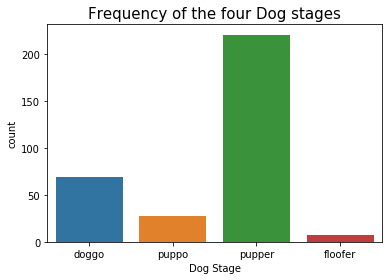

In [62]:
sns.countplot(data=twitter, x='dog_stage')
plt.title('Frequency of the four Dog stages', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stages');

##### We can see that pupper is most common dog_stage.

### Analysis of Ratings

1.200000      452
1.000000      420
1.100000      402
1.300000      257
0.900000      151
0.800000       95
0.700000       51
1.400000       35
0.500000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
42.000000       1
1.127000        1
1.350000        1
3.428571        1
0.636364        1
0.818182        1
1.126000        1
0.975000        1
177.600000      1
Name: rating, dtype: int64

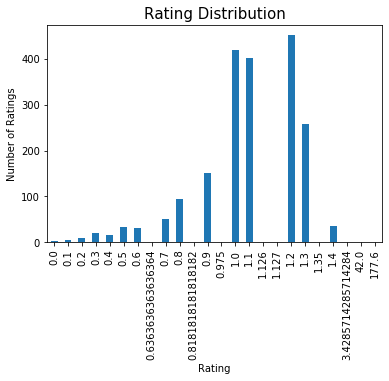

In [63]:
twitter['rating'].value_counts().sort_index().plot('bar')
plt.title ('Rating Distribution', size=15)
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.savefig('rating_distribution');
twitter['rating'].value_counts().sort_values(ascending=False)


##### We can see that majority of rating lies between 1.0 to 1.3

### Analysis of retweet count

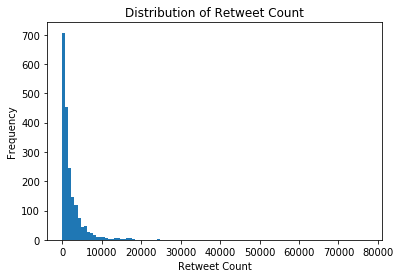

In [64]:
retweet = twitter['retweet_count']
plt.hist(retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('Distribution of Retweet Count')
plt.savefig('retweet_count_dist');

##### Nothing can be much innterpreted from this graph so the retweet_count was normalised to log base 10.

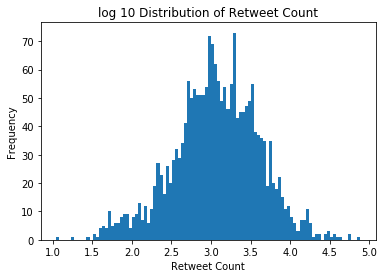

In [65]:
retweet = twitter['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(retweet, bins=100)
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.title('log 10 Distribution of Retweet Count')
plt.savefig('retweet_count_dist_log');

##### Retweet count follows a normal distribution.

### Analysis of number of retweets

timestamp  timestamp
2015       11           296
           12           366
2016       1            169
           2            111
           3            120
           4             54
           5             57
           6             81
           7             87
           8             59
           9             62
           10            65
           11            53
           12            54
2017       1             66
           2             63
           3             46
           4             41
           5             43
           6             43
           7             49
           8              2
Name: tweet_id, dtype: int64


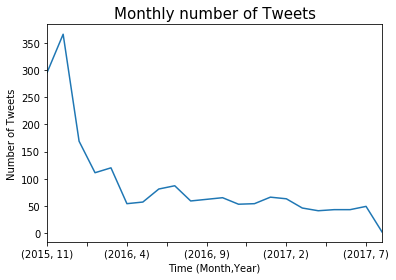

In [66]:
retweet_data = twitter['tweet_id'].groupby([twitter['timestamp'].dt.year, twitter['timestamp'].dt.month]).count()
print(retweet_data)
retweet_data.plot('line')
plt.title('Monthly number of Tweets', size=15)
plt.xlabel('Time (Month,Year)')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_over_time');

#### Analysis of dog breeds

In [67]:
print(twitter['breed'].value_counts()[0:20].sort_values(ascending=False))
print("Unique breeds in this dataset are  ",twitter['breed'].nunique())

golden_retriever             158
Labrador_retriever           106
Pembroke                      95
Chihuahua                     91
pug                           62
toy_poodle                    50
chow                          48
Pomeranian                    42
Samoyed                       41
malamute                      33
Chesapeake_Bay_retriever      31
cocker_spaniel                30
French_bulldog                30
miniature_pinscher            25
Eskimo_dog                    22
Cardigan                      21
German_shepherd               21
Siberian_husky                20
Shih-Tzu                      20
Staffordshire_bullterrier     20
Name: breed, dtype: int64
Unique breeds in this dataset are   113


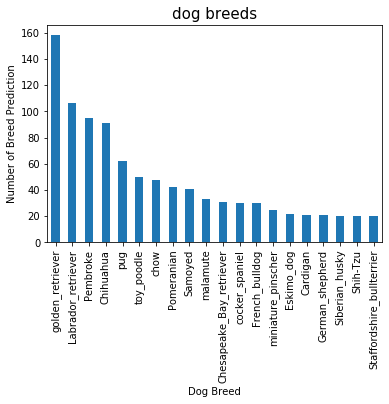

In [68]:
twitter['breed'].value_counts()[0:20].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.savefig('most_frequent_breed');

##### We can see from above visualizations that golden_retriever and labrador_retriever are most common dog breeds.

### RESOURCES


https://stackoverflow.com/questions/51782443/np-where-do-nothing-if-condition-fails

https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb

https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb

https://stackoverflow.com/questions/35919907/replace-some-specific-values-in-pandas-column-based-on-conditions-in-other-colum

https://stackoverflow.com/questions/23668427/pandas-joining-multiple-dataframes-on-columns?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa 

https://regexone.com/lesson/conditionals 

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa 

http://jonathansoma.com/lede/foundations-2017/classes/pandas-text-part-1/classwork/ 

https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

https://regex101.com/